Background

In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news oulets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: BBC, CBS, CNN, Fox, and New York times.
The first plot will be and/or feature the following:

    Be a scatter plot of sentiments of the last 100 tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
    Each plot point will reflect the compound sentiment of a tweet.
    Sort each plot point by its relative timestamp.

The second plot will be a bar plot visualizing the overall sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, seaborn, textblob, and VADER.

Your final Jupyter notebook must:

    Pull last 100 tweets from each outlet.
    Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
    Pull into a DataFrame the tweet's source acount (user's name), its text, its date (created at), and its compound, positive, neutral, and negative sentiment scores.
    Export the data in the DataFrame into a CSV file.
    Save PNG images for each plot.

As final considerations:

    Use the Matplotlib and Seaborn libraries.
    Include a written description of three observable trends based on the data.
    Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.
    Include an exported markdown version of your Notebook called README.md in your GitHub repository.

In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import csv
from pprint import pprint
import seaborn as sns
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "Mu92DNpvefQ4XfzeLnrwOPx99"
consumer_secret = "DybUt9nAcMZYtKporN8qyPig9JizczY6h3YsTah9Iy6nYVE7Xo"
access_token = "969394997077225473-uTQ6VIcY1zI5KjEzUl971BtKD5jPyac"
access_token_secret = "zWr5POWyJgY1HLEXSM5VQL8dB0PcNsoMJM0Tm6o1T9ARX"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, parser=tweepy.parsers.JSONParser())

In [2]:
# Target Search Term
target_terms = ("@nytimes", "@CNN", "@CBS",
                "@FoxNews", "@BBCNews")

In [3]:
# "Real Person" Filters
min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"

In [4]:
# Array to hold sentiment
sentiment_array = []
# Variables for holding sentiments
target_list=[]
source_list=[]
text_list=[]
created_list=[]
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
cnt=[]
# Loop through all target users
for target in target_terms:
    counter=0

    # Variable for holding the oldest tweet
    oldest_tweet = None

    # make multiple requests
    for x in range(2):

        # Run search around each tweet
        public_tweets = api.search(
            target, count=50, result_type="recent", max_id=None)

            # Loop through all tweets
        for tweet in public_tweets["statuses"]:
            counter = counter + 1

            # Use filters to check if user meets conditions
            if (tweet["user"]["followers_count"] < max_followers
                and tweet["user"]["statuses_count"] > min_tweets
                and tweet["user"]["statuses_count"] < max_tweets
                and tweet["user"]["friends_count"] < max_following
                and tweet["user"]["lang"] == lang):

                # Run Vader Analysis on each tweet
                results = analyzer.polarity_scores(tweet["text"])
                compound = results["compound"]
                pos = results["pos"]
                neu = results["neu"]
                neg = results["neg"]

                # Add each value to the appropriate array
                target_list.append(target)
                source_list.append(tweet['user']['name'])
                created_list.append(tweet["created_at"])
                text_list.append(tweet["text"])
                compound_list.append(compound)
                positive_list.append(pos)
                negative_list.append(neg)
                neutral_list.append(neu)
                cnt.append(counter)
                
                # Set the new oldest_tweet value
        oldest_tweet = int(tweet["id_str"]) - 1

sentiment_df=pd.DataFrame({
                "News_Outlet": target_list,
                "Twitter_User":source_list,
                "Tweet_Text":text_list,
                "Created_At":created_list,
                "Compound": compound_list,
                "Positive": positive_list,
                "Neutral": neutral_list,
                "Negative": negative_list,
                "Tweets Ago": cnt
                })

#         # Set the new oldest_tweet value
#         oldest_tweet = int(tweet["id_str"]) - 1

    # Print the Sentiments
print(sentiment_df)

sentiment_df.to_csv('Output.csv', index=False)  

     Compound                      Created_At  Negative  Neutral News_Outlet  \
0      0.0000  Wed Mar 14 02:38:56 +0000 2018     0.000    1.000    @nytimes   
1     -0.4939  Wed Mar 14 02:38:55 +0000 2018     0.160    0.840    @nytimes   
2     -0.4939  Wed Mar 14 02:38:55 +0000 2018     0.160    0.840    @nytimes   
3     -0.3400  Wed Mar 14 02:38:53 +0000 2018     0.118    0.882    @nytimes   
4      0.0000  Wed Mar 14 02:38:52 +0000 2018     0.000    1.000    @nytimes   
5      0.5707  Wed Mar 14 02:38:52 +0000 2018     0.099    0.601    @nytimes   
6      0.0000  Wed Mar 14 02:38:43 +0000 2018     0.000    1.000    @nytimes   
7      0.4019  Wed Mar 14 02:38:41 +0000 2018     0.000    0.870    @nytimes   
8     -0.4939  Wed Mar 14 02:38:38 +0000 2018     0.160    0.840    @nytimes   
9      0.0000  Wed Mar 14 02:38:38 +0000 2018     0.000    1.000    @nytimes   
10    -0.7096  Wed Mar 14 02:38:36 +0000 2018     0.258    0.742    @nytimes   
11     0.3382  Wed Mar 14 02:38:33 +0000

In [5]:
# pprint(public_tweets)

In [6]:
senti=sentiment_df[['News_Outlet', 'Twitter_User','Created_At', 'Tweet_Text', 
                    'Compound','Positive','Neutral','Negative','Tweets Ago']]
senti

,News_Outlet,Twitter_User,Created_At,Tweet_Text,Compound,Positive,Neutral,Negative,Tweets Ago
0,@nytimes,Glo,Wed Mar 14 02:38:56 +0000 2018,RT @ChangeTheRef: Mr. Oliver (Guac's dad) an a...,0.0000,0.000,1.000,0.000,1
1,@nytimes,Cynthia James,Wed Mar 14 02:38:55 +0000 2018,"RT @nytimes: A spokesman for ICE has resigned,...",-0.4939,0.000,0.840,0.160,2
2,@nytimes,Audrey,Wed Mar 14 02:38:55 +0000 2018,RT @nytimes: A spokesman for ICE has resigned....,-0.4939,0.000,0.840,0.160,4
3,@nytimes,Chris Sauro,Wed Mar 14 02:38:53 +0000 2018,RT @krmaher: A striking difference in tone as ...,-0.3400,0.000,0.882,0.118,5
4,@nytimes,Wyatt,Wed Mar 14 02:38:52 +0000 2018,RT @deadvoter: @nytimes https://t.co/UnnTM76Rmj,0.0000,0.000,1.000,0.000,7
5,@nytimes,Tonni Fincham,Wed Mar 14 02:38:52 +0000 2018,@nytimes He will sleep well tonight! Nice to s...,0.5707,0.300,0.601,0.099,8
6,@nytimes,M,Wed Mar 14 02:38:43 +0000 2018,@tybarker63 @nytimes Most other cultures aroun...,0.0000,0.000,1.000,0.000,12
7,@nytimes,Lee Mills,Wed Mar 14 02:38:41 +0000 2018,@crosstrainor @nytimes They may. I'm just poin...,0.4019,0.130,0.870,0.000,16
8,@nytimes,dartoamin,Wed Mar 14 02:38:38 +0000 2018,"RT @nytimes: A spokesman for ICE has resigned,...",-0.4939,0.000,0.840,0.160,20
9,@nytimes,Lisa,Wed Mar 14 02:38:38 +0000 2018,RT @ChangeTheRef: Mr. Oliver (Guac's dad) an a...,0.0000,0.000,1.000,0.000,22


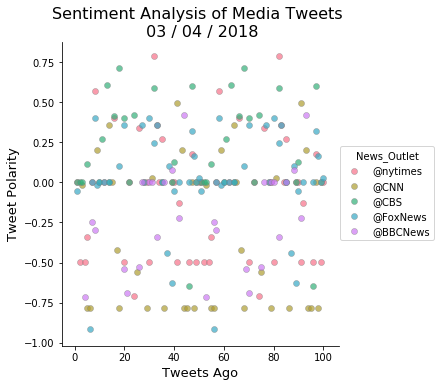

In [7]:
sns.lmplot(x="Tweets Ago", y="Compound", 
           data=senti, fit_reg=False, hue="News_Outlet", 
           palette="husl", legend=True,
           scatter_kws={
               "edgecolor":"grey",
               "linewidth":0.5,
               "alpha":0.7
           })

plt.title("Sentiment Analysis of Media Tweets \n 03 / 04 / 2018", size=16)
plt.ylabel("Tweet Polarity", size=13)
plt.xlabel("Tweets Ago", size=13)
plt.show()
plt.savefig("sentimentfig") 

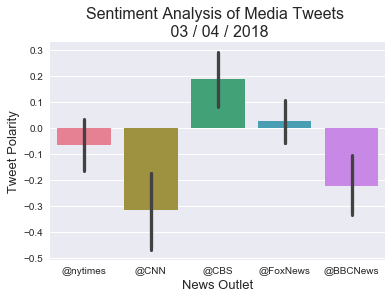

In [25]:
sns.barplot(x="News_Outlet", 
           y="Compound", 
           data=senti,
           palette="husl"
          )
plt.title("Sentiment Analysis of Media Tweets \n 03 / 04 / 2018", size=16)
plt.ylabel("Tweet Polarity", size=13)
plt.xlabel("News Outlet", size=13)
plt.show()
plt.savefig("Bar Chart Sentiment Analysis") 